<a href="https://colab.research.google.com/github/Doc-mahdi/EEG-Analysis-Power-Spectral-Density-and-Detrended-Fluctuation-Analysis-DFA-/blob/main/EEG_DFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

import mne
import pandas as pd

def load_eeg_set_file_to_dataframe(filepath):
    try:
        # Load the EEG dataset
        raw = mne.io.read_raw_eeglab(filepath, preload=True)
        print("File loaded successfully!")

        # Extract data and channel names
        data, times = raw[:]

        # Creating a DataFrame
        df = pd.DataFrame(data.T, columns=raw.ch_names)

        # If you also want to include times as a column in the DataFrame
        df['times'] = times

        return df

    except UnicodeDecodeError as e:
        print(f"A UnicodeDecodeError occurred: {e}")
    except ValueError as e:
        print(f"A ValueError occurred: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Path to your .set files
file_path_N = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.set'
file_path_D = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.set'

# Load the EEG data and convert to DataFrame
eeg_dataframe_N = load_eeg_set_file_to_dataframe(file_path_N)
eeg_dataframe_D = load_eeg_set_file_to_dataframe(file_path_D)

# Display the DataFrame if successfully loaded

if eeg_dataframe_N is not None:
    print("DataFrame for Deprived session:")
    print(eeg_dataframe_N.head())  # Shows the first few rows of the DataFrame


Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully!
Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully!
DataFrame for Deprived session:
        Fp1       AF3       AF7        Fz        F1        F3        F5  \
0  0.000082  0.000040  0.000125  0.000065  0.000011  0.000065  0.000069   
1  0.000083  0.000041  0.000144  0.000065  0.000013  0.000066  0.000069   
2  0.000077  0.000038  0.000123  0.000063  0.000012  0.000065  0.000070   
3  0.000076  0.000038  0.000123  0.000063  0.000012  0.000068  0.000070   
4  0.000077  0.000039  0.000153  0.000065  0.000014  0.000068  0.000069   

         F7       FC1       FC3  ...      TP10        P2        P4        P6  \
0  0.000036  0.000057 -0.000001  ... -0.000136  0.000005  0.000008 -0.000044   
1  0.00

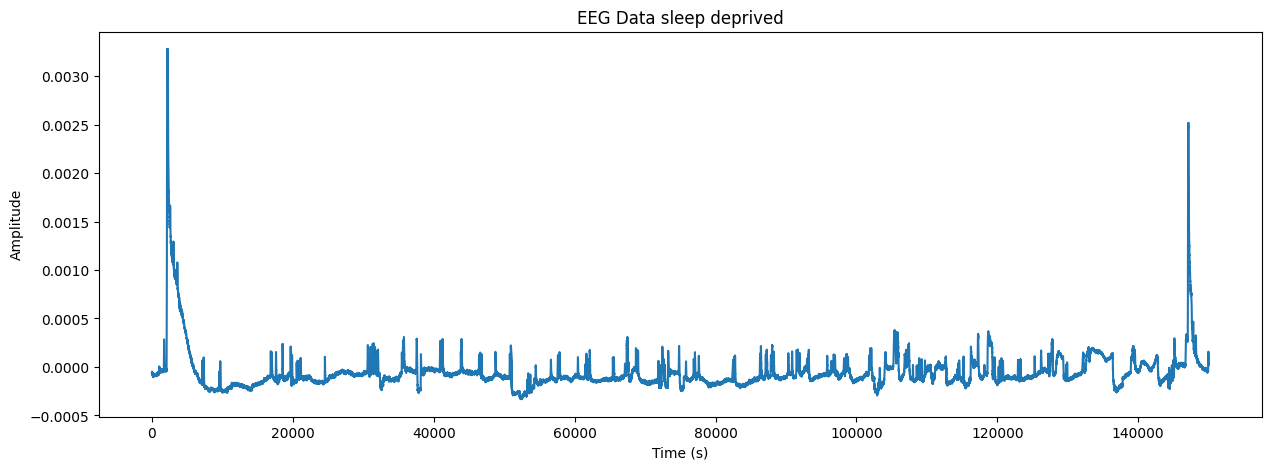

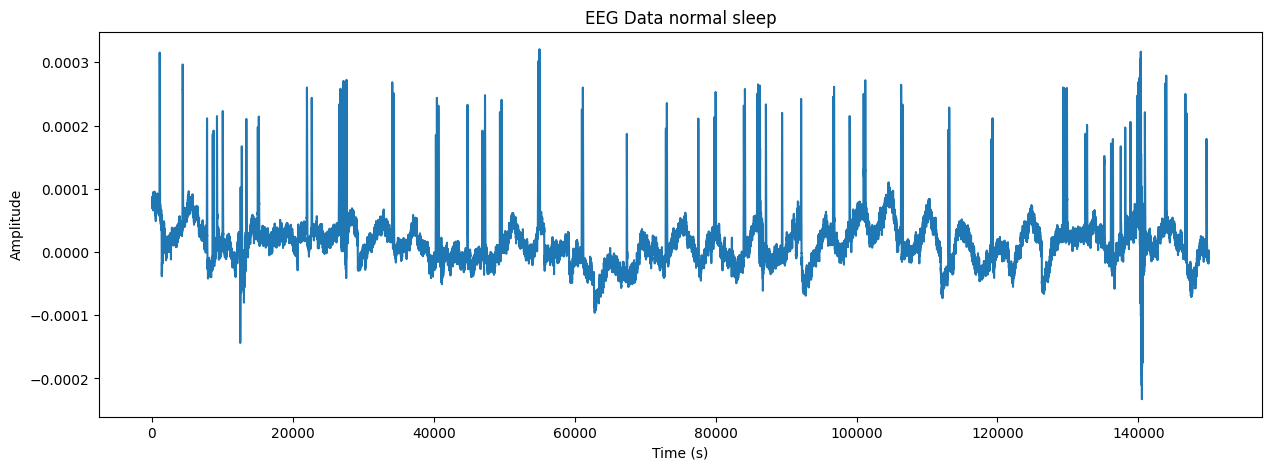

In [7]:
# prompt: plot this data

import matplotlib.pyplot as plt

# Plot the data for the first channel
eeg_dataframe_D.iloc[:, 0].plot(figsize=(15, 5), title='EEG Data sleep deprived')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

eeg_dataframe_N.iloc[:, 0].plot(figsize=(15, 5), title='EEG Data normal sleep')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# You can repeat the same for other channels or use other plotting techniques
# as needed.


Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully: /content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.set
Effective window size : 4.096 (s)
PSD computed successfully!
Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully: /content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.set
Effective window size : 4.096 (s)
PSD computed successfully!
PSD DataFrame for Normal session:
        0.732422      0.976562      1.220703      1.464844      1.708984   \
Fp1  2.583552e-10  1.627593e-10  1.340337e-10  1.061903e-10  1.135560e-10   
AF3  2.884893e-10  1.856408e-10  1.461233e-10  1.134022e-10  1.226744e-10   
AF7  2.223575e-10  1.637816e-10  1.042300e-10  5.570833e-11  5.803145e-11   
Fz   2.135403e-10 

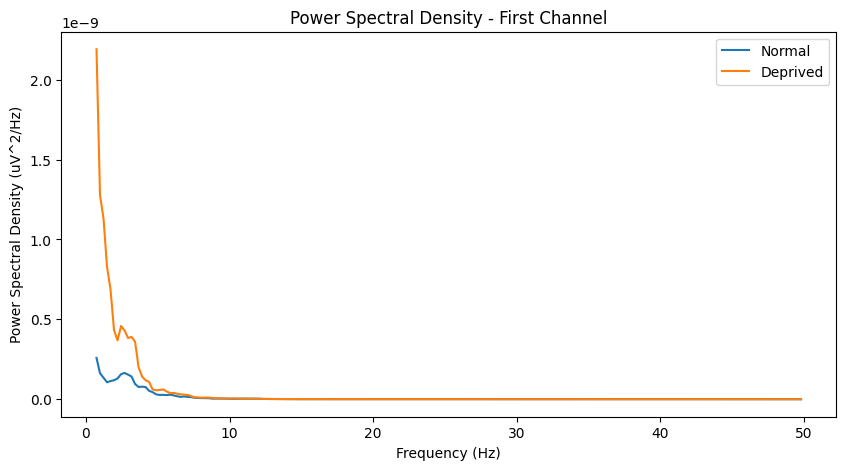

In [8]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

def compute_psd(raw, fmin=0.5, fmax=50):
    try:
        # Compute the PSD using Welch's method
        psd = raw.compute_psd(method='welch', fmin=fmin, fmax=fmax, n_fft=2048)
        print("PSD computed successfully!")

        # Extract the PSD and frequencies
        psds = psd.get_data()
        freqs = psd.freqs

        # Convert PSD results to DataFrame
        df_psd = pd.DataFrame(psds, columns=freqs, index=raw.ch_names)

        return df_psd
    except Exception as e:
        print(f"An error occurred while computing PSD: {e}")
        return None

# Function to load and compute PSD for a given file path
def load_and_compute_psd(filepath):
    try:
        # Load the EEG dataset
        raw = mne.io.read_raw_eeglab(filepath, preload=True)
        print(f"File loaded successfully: {filepath}")

        # Compute PSD
        psd_df = compute_psd(raw)

        return psd_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Paths to your .set files
file_path_N = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.set'
file_path_D = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.set'

# Load EEG data and compute PSD
psd_dataframe_N = load_and_compute_psd(file_path_N)
psd_dataframe_D = load_and_compute_psd(file_path_D)

# Display the DataFrame if successfully loaded
if psd_dataframe_N is not None:
    print("PSD DataFrame for Normal session:")
    print(psd_dataframe_N.head())  # Shows the first few rows of the DataFrame

if psd_dataframe_D is not None:
    print("PSD DataFrame for Deprived session:")
    print(psd_dataframe_D.head())  # Shows the first few rows of the DataFrame

# Optionally, plot the PSD for the first channel
if psd_dataframe_N is not None and psd_dataframe_D is not None:
    plt.figure(figsize=(10, 5))
    plt.plot(psd_dataframe_N.columns, psd_dataframe_N.iloc[0], label='Normal')
    plt.plot(psd_dataframe_D.columns, psd_dataframe_D.iloc[0], label='Deprived')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (uV^2/Hz)')
    plt.title('Power Spectral Density - First Channel')
    plt.legend()
    plt.show()


Reading /content/drive/MyDrive/EEG_DATA/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully: /content/drive/MyDrive/EEG_DATA/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesopen_eeg.set


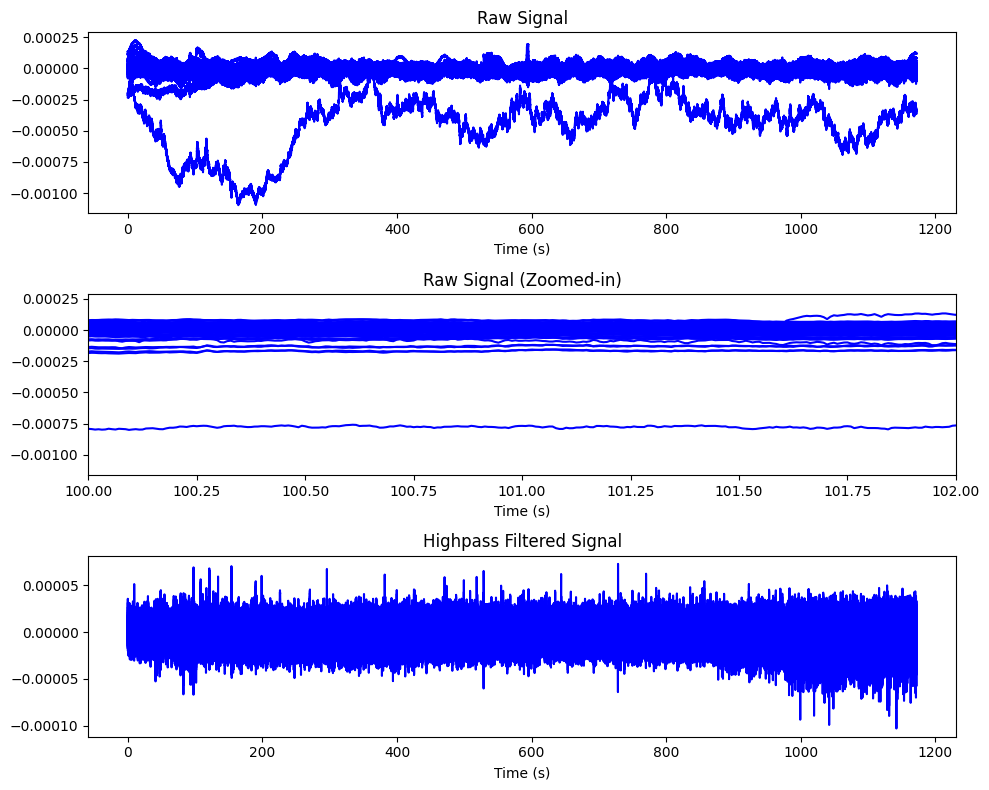

In [9]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to load EEG data and apply highpass filter
def load_and_filter_eeg(filepath, fco=0.5, fs=128):
    try:
        # Load the EEG dataset
        raw = mne.io.read_raw_eeglab(filepath, preload=True)
        print(f"File loaded successfully: {filepath}")

        # Convert to numpy array
        data = raw.get_data()

        # Time vector
        t = np.arange(data.shape[1]) / fs

        # Highpass filter parameters
        fco_norm = fco / (fs / 2)
        b, a = butter(2, fco_norm, 'high')

        # Apply highpass filter
        filtered_data = filtfilt(b, a, data, axis=-1)

        return t, data, filtered_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

# Path to your .set file
file_path = '/content/drive/MyDrive/EEG_DATA/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesopen_eeg.set'

# Load and filter EEG data
t, raw_data, filtered_data = load_and_filter_eeg(file_path)

# Plotting the signals
if t is not None and raw_data is not None and filtered_data is not None:
    # Plot raw signal
    plt.figure(figsize=(10, 8))
    plt.subplot(3, 1, 1)
    plt.plot(t, raw_data.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Raw Signal')

    # Plot zoomed-in segment of raw signal
    plt.subplot(3, 1, 2)
    plt.plot(t, raw_data.T, '-b')
    plt.xlim([100, 102])
    plt.xlabel('Time (s)')
    plt.title('Raw Signal (Zoomed-in)')

    # Plot highpass filtered signal
    plt.subplot(3, 1, 3)
    plt.plot(t, filtered_data.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Highpass Filtered Signal')

    plt.tight_layout()
    plt.show()

Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully: /content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.set
Reading /content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
File loaded successfully: /content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.set


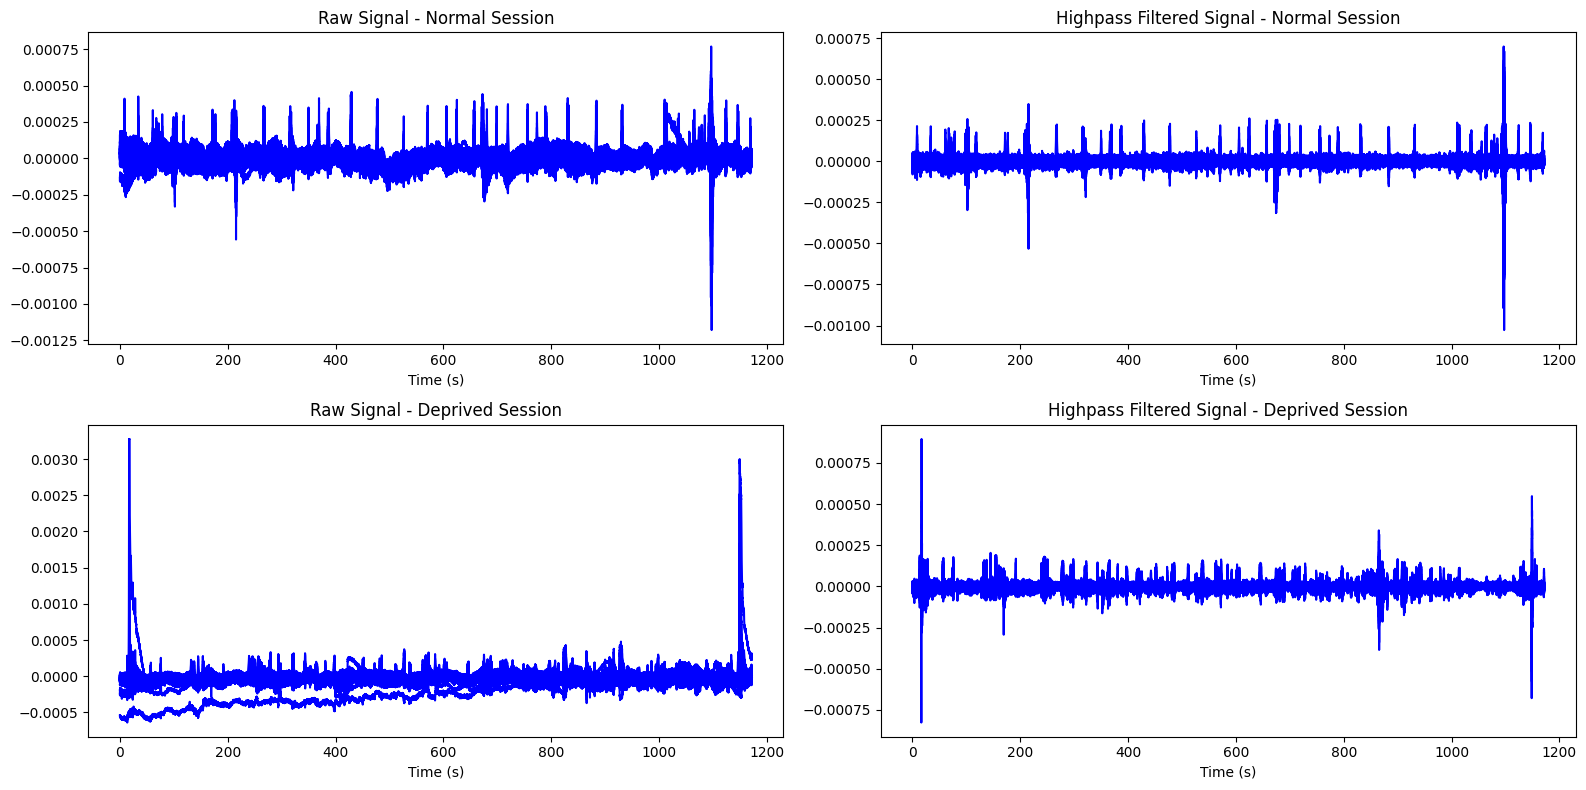

In [10]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to load EEG data and apply highpass filter
def load_and_filter_eeg(filepath, fco=0.5, fs=128):
    try:
        # Load the EEG dataset
        raw = mne.io.read_raw_eeglab(filepath, preload=True)
        print(f"File loaded successfully: {filepath}")

        # Convert to numpy array
        data = raw.get_data()

        # Time vector
        t = np.arange(data.shape[1]) / fs

        # Highpass filter parameters
        fco_norm = fco / (fs / 2)
        b, a = butter(2, fco_norm, 'high')

        # Apply highpass filter
        filtered_data = filtfilt(b, a, data, axis=-1)

        return t, data, filtered_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

# Paths to your .set files
file_path_N = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-1/eeg/sub-02_ses-1_task-eyesopen_eeg.set'
file_path_D = '/content/drive/MyDrive/EEG_DATA/sub-02/ses-2/eeg/sub-02_ses-2_task-eyesopen_eeg.set'

# Load and filter EEG data for Normal session (N)
t_N, raw_data_N, filtered_data_N = load_and_filter_eeg(file_path_N)

# Load and filter EEG data for Deprived session (D)
t_D, raw_data_D, filtered_data_D = load_and_filter_eeg(file_path_D)

# Plotting the signals side by side
if t_N is not None and raw_data_N is not None and filtered_data_N is not None and \
   t_D is not None and raw_data_D is not None and filtered_data_D is not None:

    # Create figure with two subplots
    plt.figure(figsize=(16, 8))

    # Plot for Normal session (N)
    plt.subplot(2, 2, 1)
    plt.plot(t_N, raw_data_N.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Raw Signal - Normal Session')

    plt.subplot(2, 2, 2)
    plt.plot(t_N, filtered_data_N.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Highpass Filtered Signal - Normal Session')

    # Plot for Deprived session (D)
    plt.subplot(2, 2, 3)
    plt.plot(t_D, raw_data_D.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Raw Signal - Deprived Session')

    plt.subplot(2, 2, 4)
    plt.plot(t_D, filtered_data_D.T, '-b')
    plt.xlabel('Time (s)')
    plt.title('Highpass Filtered Signal - Deprived Session')

    plt.tight_layout()
    plt.show()


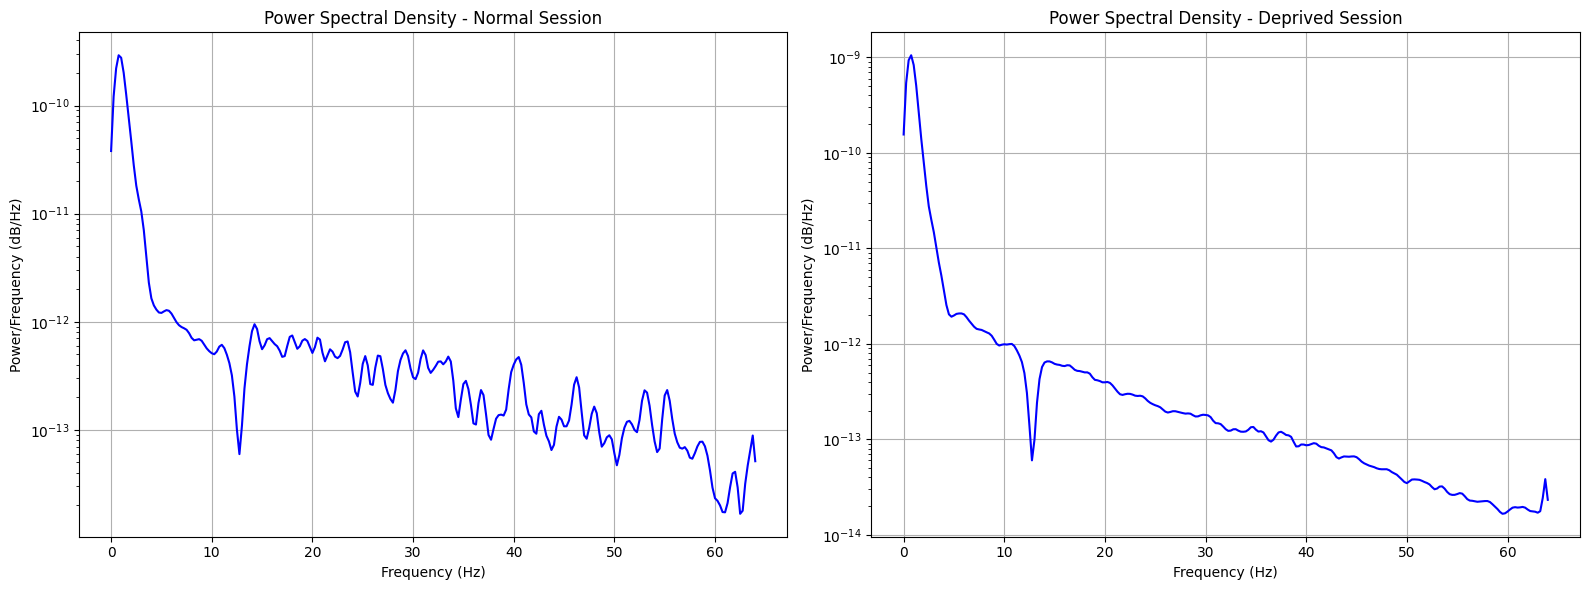

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Function to compute PSD
def compute_psd(data, fs):
    # Compute PSD using Welch's method
    freqs, psd = welch(data, fs=fs, nperseg=256, nfft=512)

    return freqs, psd

# Sampling rate
fs = 128  # Replace with your actual sampling rate if different

# Compute PSD for Normal session (N)
freqs_N, psd_N = compute_psd(filtered_data_N[0], fs)

# Compute PSD for Deprived session (D)
freqs_D, psd_D = compute_psd(filtered_data_D[0], fs)

# Plotting the PSDs side by side
plt.figure(figsize=(16, 6))

# Plot for Normal session (N)
plt.subplot(1, 2, 1)
plt.semilogy(freqs_N, psd_N, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density - Normal Session')
plt.grid(True)

# Plot for Deprived session (D)
plt.subplot(1, 2, 2)
plt.semilogy(freqs_D, psd_D, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density - Deprived Session')
plt.grid(True)

plt.tight_layout()
plt.show()


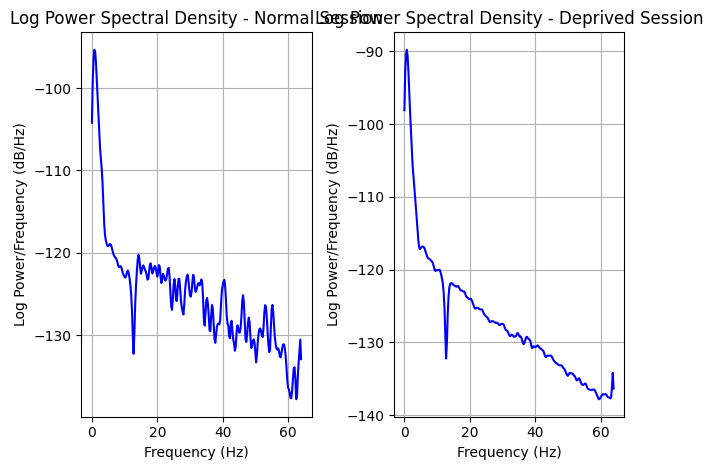

In [12]:
plt.subplot(1, 2, 1)
plt.plot(freqs_N, 10 * np.log10(psd_N), '-b')  # Logarithm of power (in dB)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power/Frequency (dB/Hz)')
plt.title('Log Power Spectral Density - Normal Session')
plt.grid(True)

# Plot for Deprived session (D)
plt.subplot(1, 2, 2)
plt.plot(freqs_D, 10 * np.log10(psd_D), '-b')  # Logarithm of power (in dB)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power/Frequency (dB/Hz)')
plt.title('Log Power Spectral Density - Deprived Session')
plt.grid(True)

plt.tight_layout()
plt.show()

NOW DFA ANNALYSIS : DETRENDED FLUCTUATION ANNALYSIS

In [13]:
''''
def detrended_fluctuation_analysis(signal, window_sizes):

     dfa_values = []

     for window_size in window_sizes:
        if len(signal) <= window_size:
            continue

        # Step 1: Partitioning the signal
        n_windows = len(signal) // window_size
        windows = np.array_split(signal[:n_windows*window_size], n_windows)

        # Step 2: Detrending and RMS fluctuations
        fluctuations = []
        for window in windows:
            # Apply detrending using a polynomial fit
            idx = np.arange(len(window))
            coeffs = np.polyfit(idx, window, 1)
            trend = np.polyval(coeffs, idx)
            detrended_window = window - trend
            rms_fluctuation = np.sqrt(np.mean(detrended_window ** 2))
            fluctuations.append(rms_fluctuation)

        # Step 3: Average fluctuations
        dfa_value = np.mean(fluctuations)
        dfa_values.append(dfa_value)

     return np.array(dfa_values)

In [14]:
 '''''
 ## Example data for testing
filtered_data_N_stacked = np.random.rand(150000, 61)

# Determine the maximum window size
max_window_size = min(filtered_data_N_stacked.shape) // 10

# Generate window sizes
window_sizes = np.arange(1, max_window_size)

# Perform DFA for Normal session (N) with different window sizes
dfa_values_N = []
for window_size in window_sizes:
    # Perform DFA on the first channel's data
    dfa_N = detrended_fluctuation_analysis(filtered_data_N_stacked[0], window_size)
    dfa_values_N.append(dfa_N)

# Plot DFA curves for different window sizes
plt.figure(figsize=(12, 8))
plt.plot(window_sizes, dfa_values_N, marker='o', linestyle='-', label='DFA')
plt.xlabel('Window Size')
plt.ylabel('DFA')
plt.title('Detrended Fluctuation Analysis (DFA) - Normal Session')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'numpy.int64' object is not iterable




Processing Normal Session:   0%|          | 0/61 [00:00<?, ?it/s]


Processing Normal Session:   3%|▎         | 2/61 [00:00<00:10,  5.84it/s]


Processing Normal Session:   7%|▋         | 4/61 [00:22<06:14,  6.58s/it]


Processing Normal Session:  10%|▉         | 6/61 [00:42<07:25,  8.10s/it]


Processing Normal Session:  13%|█▎        | 8/61 [00:55<06:35,  7.46s/it]


Processing Normal Session:  16%|█▋        | 10/61 [01:07<05:55,  6.97s/it]


Processing Normal Session:  20%|█▉        | 12/61 [01:20<05:34,  6.82s/it]


Processing Normal Session:  23%|██▎       | 14/61 [01:34<05:21,  6.84s/it]


Processing Normal Session:  26%|██▌       | 16/61 [01:47<05:05,  6.79s/it]


Processing Normal Session:  30%|██▉       | 18/61 [01:59<04:41,  6.56s/it]


Processing Normal Session:  33%|███▎      | 20/61 [02:13<04:31,  6.63s/it]


Processing Normal Session:  36%|███▌      | 22/61 [02:26<04:20,  6.68s/it]


Processing Normal Session:  39%|███▉      | 24/61 [02:40<04:08,  6.71s/it]


Processin

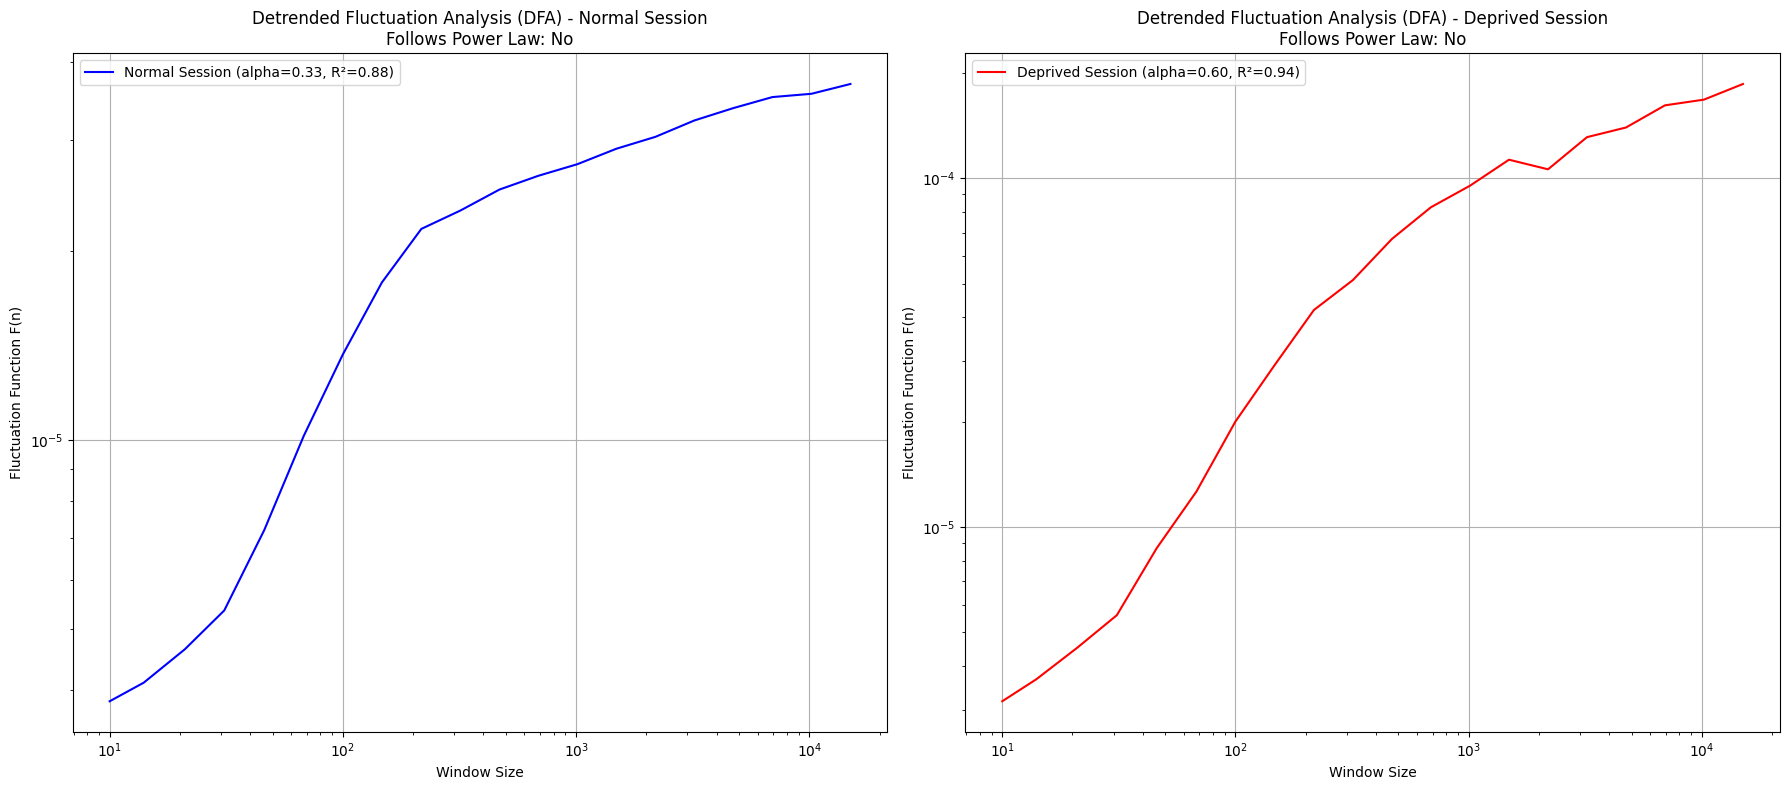

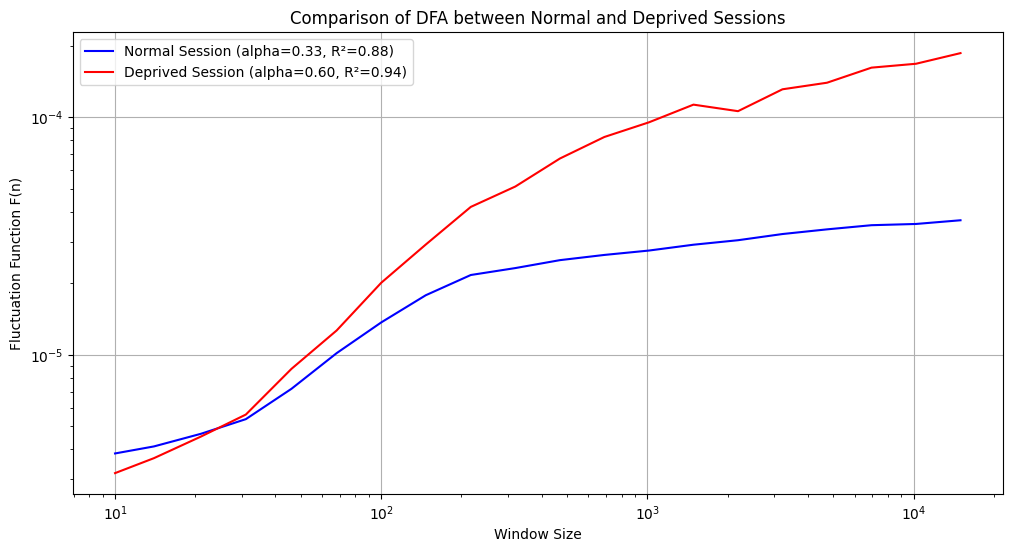

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
from scipy.stats import linregress

# Function to perform DFA
def detrended_fluctuation_analysis(signal, window_sizes):
    N = len(signal)
    F_n = np.zeros(len(window_sizes))

    for i, window_size in enumerate(window_sizes):
        segments = N // window_size
        RMS = np.zeros(segments)

        x = np.arange(window_size)
        for j in range(segments):
            segment = signal[j * window_size:(j + 1) * window_size]
            p = np.polyfit(x, segment, 1)
            trend = np.polyval(p, x)
            detrended_segment = segment - trend
            RMS[j] = np.sqrt(np.mean(detrended_segment**2))

        F_n[i] = np.sqrt(np.mean(RMS**2))

    log_window_sizes = np.log(window_sizes)
    log_F_n = np.log(F_n)
    slope, intercept, r_value, _, _ = linregress(log_window_sizes, log_F_n)

    alpha = slope
    r_squared = r_value**2

    return F_n, alpha, r_squared

# Assuming your DataFrame `eeg_dataframe_N` and `eeg_dataframe_D` are loaded and contain EEG signals
filtered_data_N = np.array(eeg_dataframe_N.iloc[:, :-1])  # Exclude the 'times' column if it exists
filtered_data_D = np.array(eeg_dataframe_D.iloc[:, :-1])  # Exclude the 'times' column if it exists

# Choose window sizes for DFA using logarithmic spacing
min_window_size = 10
max_window_size = len(filtered_data_N) // 10
window_sizes = np.unique(np.logspace(np.log10(min_window_size), np.log10(max_window_size), num=20).astype(int))

# Perform DFA for each channel using parallel processing with tqdm for progress tracking
n_jobs = -1  # Use all available CPU cores

# Function to perform DFA on a single channel
def compute_dfa_for_channel(channel_data):
    return detrended_fluctuation_analysis(channel_data, window_sizes)

# Perform DFA for Normal session (N) with progress bars
dfa_results_N = Parallel(n_jobs=n_jobs)(
    delayed(compute_dfa_for_channel)(channel) for channel in tqdm(filtered_data_N.T, desc="Processing Normal Session", leave=False)
)

# Perform DFA for Deprived session (D) with progress bars
dfa_results_D = Parallel(n_jobs=n_jobs)(
    delayed(compute_dfa_for_channel)(channel) for channel in tqdm(filtered_data_D.T, desc="Processing Deprived Session", leave=False)
)

# Plot DFA results for a single channel (choose one channel to plot)
channel_index = 0  # Index of the channel to plot
F_n_N, alpha_N, r_squared_N = dfa_results_N[channel_index]
F_n_D, alpha_D, r_squared_D = dfa_results_D[channel_index]

# Determine if the data follows a power law based on the R-squared value
threshold_r_squared = 0.95  # This threshold can be adjusted based on the required confidence
follows_power_law_N = r_squared_N > threshold_r_squared
follows_power_law_D = r_squared_D > threshold_r_squared
result_text_N = "Yes" if follows_power_law_N else "No"
result_text_D = "Yes" if follows_power_law_D else "No"

# Plot the results
plt.figure(figsize=(18, 8))

# Plot for Normal session (N)
plt.subplot(1, 2, 1)
plt.loglog(window_sizes, F_n_N, 'b', label=f'Normal Session (alpha={alpha_N:.2f}, R²={r_squared_N:.2f})')
plt.xlabel('Window Size')
plt.ylabel('Fluctuation Function F(n)')
plt.legend()
plt.title(f'Detrended Fluctuation Analysis (DFA) - Normal Session\nFollows Power Law: {result_text_N}')
plt.grid(True)

# Plot for Deprived session (D)
plt.subplot(1, 2, 2)
plt.loglog(window_sizes, F_n_D, 'r', label=f'Deprived Session (alpha={alpha_D:.2f}, R²={r_squared_D:.2f})')
plt.xlabel('Window Size')
plt.ylabel('Fluctuation Function F(n)')
plt.legend()
plt.title(f'Detrended Fluctuation Analysis (DFA) - Deprived Session\nFollows Power Law: {result_text_D}')
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparison plot
plt.figure(figsize=(12, 6))
plt.loglog(window_sizes, F_n_N, 'b', label=f'Normal Session (alpha={alpha_N:.2f}, R²={r_squared_N:.2f})')
plt.loglog(window_sizes, F_n_D, 'r', label=f'Deprived Session (alpha={alpha_D:.2f}, R²={r_squared_D:.2f})')
plt.xlabel('Window Size')
plt.ylabel('Fluctuation Function F(n)')
plt.legend()
plt.title('Comparison of DFA between Normal and Deprived Sessions')
plt.grid(True)
plt.show()
